<a href="https://colab.research.google.com/github/joananana/CAN/blob/main/Exerc%C3%ADcios_C%C3%A1p_7_Ajuste_de_Curvas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Questão 1 Regressão polinomial



Coeficients:
  
-0.9466 x + 8.632
Fitment: 83.3742 %

Coeficients:
         2
0.1758 x - 2.767 x + 11.55
Fitment: 97.6662 %

Coeficients:
           3          2
-0.02349 x + 0.5647 x - 4.549 x + 13.4
Fitment: 98.8659 %

Coeficients:
           4          3         2
0.004495 x - 0.1209 x + 1.265 x - 6.427 x + 14.85
Fitment: 99.1236 %

Coeficients:
            5           4          3         2
-0.002654 x + 0.07722 x - 0.8485 x + 4.486 x - 12.46 x + 18.56
Fitment: 99.5663 %



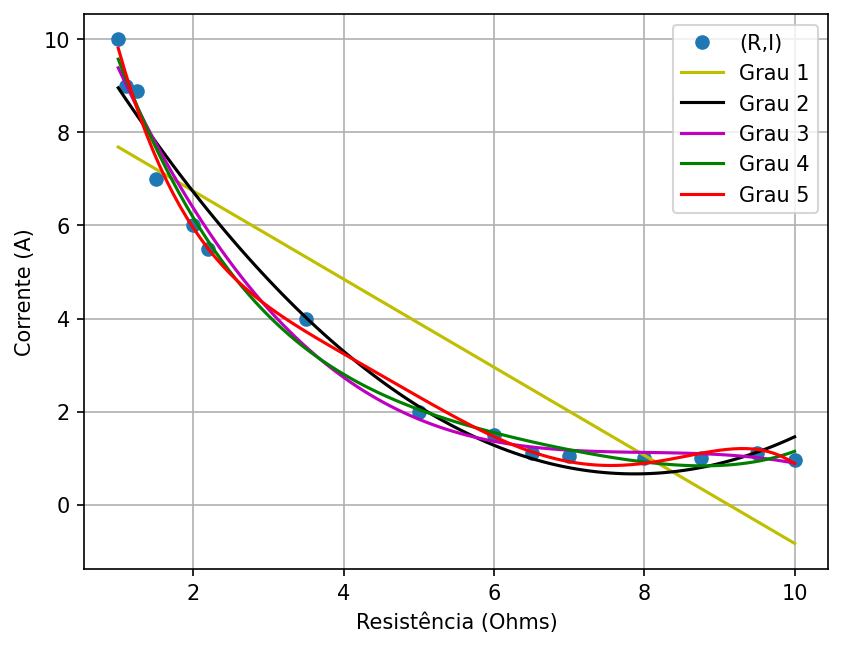

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.x = [ 1 , 1.1, 1.25, 1.5, 2, 2.2, 3.5, 5,   6, 6.5,    7, 8, 8.75, 9.5, 10]
np.y = [ 10,   9,  8.9,   7, 6, 5.5,   4, 2, 1.5, 1.1, 1.05, 1,    1, 1.1, 0.95]
x = np.array(np.x) # transpose is needed to interpret the single
y = np.array(np.y) # vector array as N unidimentional vectors


plt.figure(dpi=150) # graph resolution
plt.grid()  # make some reference lines
plt.plot(x, y, "o", label="(R,I)")
plt.xlabel("Resistência (Ohms)")
plt.ylabel("Corrente (A)")

xx = np.linspace(min(x), max(x), 100) # from A to B in 100 steps

###########################################
def r2_fited(y_orig, y_fited):
    y_bar = y_orig.mean()
    ss_tot = ((y_orig-y_bar)**2).sum()
    ss_res = ((y_orig-y_fited)**2).sum()
    return 1 - (ss_res/ss_tot)
###########################################

coef = np.poly1d(np.polyfit(x, y, 1))  # Last argument is degree of polynomial
plt.plot(xx,np.polyval(coef,xx),'y', label="Grau 1")
print("Coeficients:\n", coef)
print("Fitment:",'%.4f' % (r2_fited(y,np.polyval(coef,x))*100),"%\n")
#print(np.corrcoef(xx,np.polyval(coef,xx))[0, 1]**2) #linear only

coef = np.poly1d(np.polyfit(x, y, 2))  # Last argument is degree of polynomial
plt.plot(xx,np.polyval(coef,xx),'k', label="Grau 2")
print("Coeficients:\n", coef)
print("Fitment:",'%.4f' % (r2_fited(y,np.polyval(coef,x))*100),"%\n")


coef = np.poly1d(np.polyfit(x, y, 3))  # Last argument is degree of polynomial
plt.plot(xx,np.polyval(coef,xx),'m', label="Grau 3")
print("Coeficients:\n", coef)
print("Fitment:",'%.4f' % (r2_fited(y,np.polyval(coef,x))*100),"%\n")

coef = np.poly1d(np.polyfit(x, y, 4))  # Last argument is degree of polynomial
plt.plot(xx,np.polyval(coef,xx),'g', label="Grau 4")
print("Coeficients:\n", coef)
print("Fitment:",'%.4f' % (r2_fited(y,np.polyval(coef,x))*100),"%\n")

coef = np.poly1d(np.polyfit(x, y, 5))  # Last argument is degree of polynomial
plt.plot(xx,np.polyval(coef,xx),'r', label="Grau 5")
print("Coeficients:\n", coef)
print("Fitment:",'%.4f' % (r2_fited(y,np.polyval(coef,x))*100),"%\n")


plt.legend()
plt.show()

#Questão 2 Interpolação polinomial


Lagrange : 62.8139 

Newton: 62.8139 

polinomial N=2: 68.5933
Coeficients:
           2
-0.03011 x + 6.07 x + 68.59 

polinomial N=3: 62.8139
Coeficients:
            3           2
-0.004595 x + 0.08745 x + 23.11 x + 62.81 



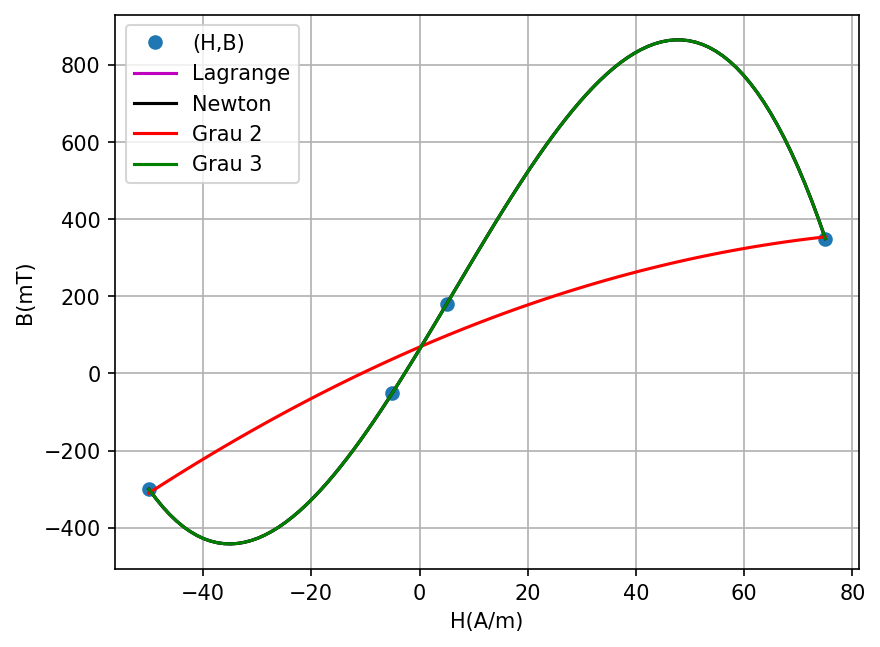

In [2]:
import numpy as np
import matplotlib.pyplot as plt

################## newton_polyval Function ##################
def newton_polyval(x, y, prediction):
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    coef = coef[0, :] # take only the first line
    #print("Coeficients:\n", coef)

    n = len(x) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (prediction -x[n-k])*p
    return p
############################################################


np.x = [ -50, -5, 5, 75]
np.y = [ -300, -50, 180, 350]
x = np.array(np.x) # transpose is needed to interpret the single
y = np.array(np.y) # vector array as N unidimentional vectors


plt.figure(dpi=150) # graph resolution
plt.grid()  # make some reference lines
plt.plot(x, y, "o", label="(H,B)")
plt.xlabel("H(A/m)")
plt.ylabel("B(mT)")

xx = np.linspace(min(x), max(x), 100) # from A to B in 100 steps

from scipy.interpolate import lagrange
lg = lagrange(x, y)
plt.plot(xx, lg(xx), 'm', label="Lagrange")
print("Lagrange :",'%.4f' % lg(0),"\n")


plt.plot(xx,newton_polyval(x, y , xx),'k', label="Newton")
print("Newton:",'%.4f' % newton_polyval(x, y , 0),"\n")


coef = np.poly1d(np.polyfit(x, y, 2))  # Last argument is degree of polynomial
plt.plot(xx,np.polyval(coef,xx),'r', label="Grau 2")
print("polinomial N=2:",'%.4f' % np.polyval(coef,0))
print("Coeficients:\n", coef,"\n")


coef = np.poly1d(np.polyfit(x, y, 3))  # Last argument is degree of polynomial
plt.plot(xx,np.polyval(coef,xx),'g', label="Grau 3")
print("polinomial N=3:",'%.4f' % np.polyval(coef,0))
print("Coeficients:\n", coef,"\n")



plt.legend()

plt.show()

#Questão 3 Spilines

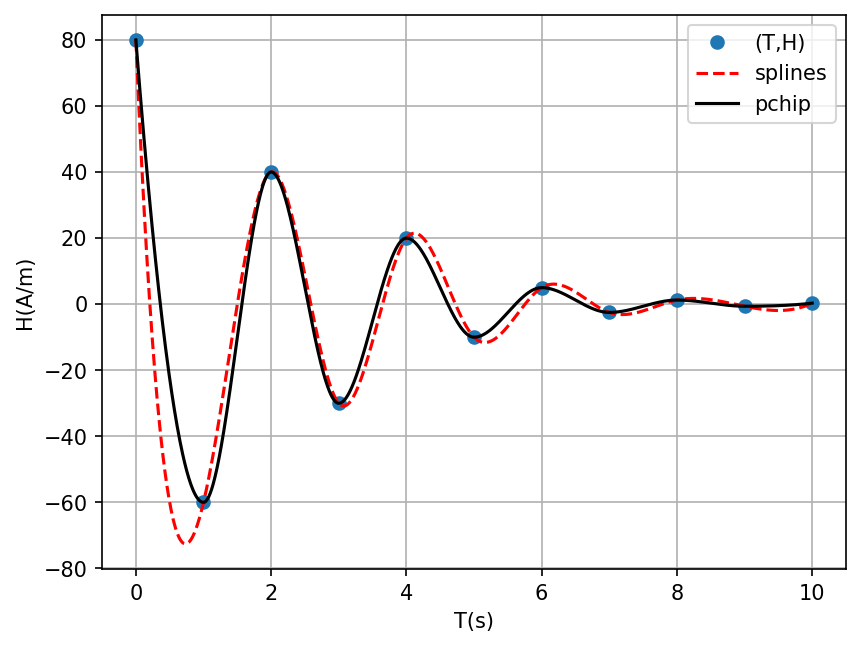

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
#from scipy import interpolate
from scipy.interpolate import pchip_interpolate

np.x = np.arange(0,11,1)
np.y = [80, -60, 40, -30, 20, -10, 5, -2.5, 1.25, -0.625, 0.3125]
x = np.array(np.x) # transpose is needed to interpret the single
y = np.array(np.y) # vector array as N unidimentional vectors


plt.figure(dpi=150) # graph resolution
plt.grid()  # make some reference lines
plt.plot(x, y, "o", label="(T,H)")
plt.xlabel("T(s)")
plt.ylabel("H(A/m)")

xx = np.linspace(min(x), max(x), 1000) # from A to B in 100 steps

plt.plot(xx, scipy.interpolate.splev(xx, scipy.interpolate.splrep(x, y, s=0), der=0),'--r', label="splines")
plt.plot(xx, pchip_interpolate(x, y, xx, der=0, axis=0), 'k',label="pchip")

plt.legend()
plt.show()

#Questão 4 Fourier

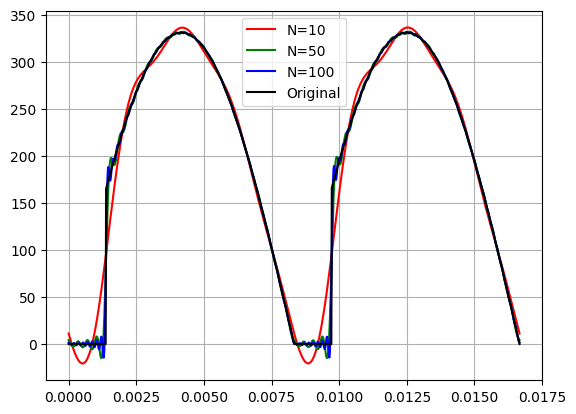

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, cos, sin

t = 1/60
x = np.linspace(0,t, 1000) # from A to B in N steps
dx = t / (len(x)-1)
slice1 = int(np.floor(len(x)/12)) # pi/12
slice2 = int(np.floor(len(x)/2))  # pi
f = abs(331*sin(2*pi*60*x))
f[0: slice1] = 0 # cut 0 to pi/12 to 0
f[slice2: slice2+slice1 ] = 0 # cut pi to pi+pi/12 to 0

plt.figure(dpi=100) # graph resolution
plt.grid()  # make some reference lines

A0 = np.sum (f * np.ones_like(x)) * dx * 2 / t
fFS = A0/2 * np.ones_like(f)
for k in range(1,10):
    Ak = np.sum(f* np.cos (2*np.pi*k*x/t)) * dx * 2 /t
    Bk = np.sum (f* np.sin(2*np.pi*k*x/t)) * dx * 2 /t
    fFS = fFS + Ak*np.cos (2*k* np.pi*x/t) + Bk*np.sin(2*k*np.pi*x/t)
plt.plot(x, fFS, color='r', label="N=10")

fFS = A0/2 * np.ones_like(f)
for k in range(1,50):
    Ak = np.sum(f* np.cos (2*np.pi*k*x/t)) * dx * 2 /t
    Bk = np.sum (f* np.sin(2*np. pi*k*x/t)) * dx * 2 /t
    fFS = fFS + Ak*np.cos (2*k* np. pi*x/t) + Bk*np.sin(2*k*np. pi*x/t)
plt.plot(x, fFS, color='g', label="N=50")

fFS = A0/2 * np.ones_like(f)
for k in range(1,100):
    Ak = np.sum(f* np.cos (2*np.pi*k*x/t)) * dx * 2 /t
    Bk = np.sum (f* np.sin(2*np. pi*k*x/t)) * dx * 2 /t
    fFS = fFS + Ak*np.cos (2*k* np. pi*x/t) + Bk*np.sin(2*k*np. pi*x/t)
plt.plot(x, fFS, color='b', label="N=100")

plt.plot(x,f,color='k', label="Original")

plt.legend()
plt.show()